In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

quivr (no kleene) failed: 1


/opt/conda/envs/env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


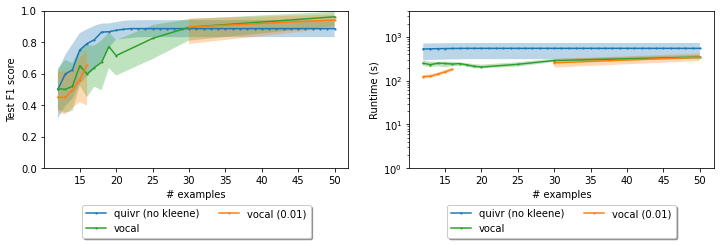

In [27]:
def plot_query_median():
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-sampling_rate_4"

    fig, axs = plt.subplots(1, 2, figsize = (12, 3))

    # Quivr without kleene
    try:
        count_failed = 0
        quivr_f1 = []
        quivr_runtime = []
        dir_name = os.path.join(exp_dir, 
                               "stats", 
                               "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None"
                                )
        for filename in os.listdir(dir_name):
            with open(os.path.join(dir_name, filename), "r") as f:
                quivr_stats = json.load(f)
            quivr_runtime_per_run = quivr_stats["runtime"]
            quivr_f1_per_run = quivr_stats["score_median"]
            if sum(quivr_f1_per_run) / len(quivr_f1_per_run) == 0:
                count_failed += 1
                continue
            quivr_f1.append(quivr_f1_per_run)
            quivr_runtime.append(quivr_runtime_per_run)
        
        print("quivr (no kleene) failed: {}".format(count_failed))
        quivr_x = list(range(12, 51))
        quivr_f1 = np.array(quivr_f1)
        quivr_f1_25 = np.percentile(quivr_f1, 25, axis=0)
        quivr_f1_50 = np.percentile(quivr_f1, 50, axis=0)
        quivr_f1_75 = np.percentile(quivr_f1, 75, axis=0)
        quivr_runtime = np.array(quivr_runtime)
        quivr_runtime_25 = np.percentile(quivr_runtime, 25, axis=0)
        quivr_runtime_50 = np.percentile(quivr_runtime, 50, axis=0)
        quivr_runtime_75 = np.percentile(quivr_runtime, 75, axis=0)
        axs[0].plot(quivr_x, quivr_f1_50, marker='s', markersize=1, label="quivr (no kleene)", color='tab:blue')
        axs[0].fill_between(quivr_x, quivr_f1_25, quivr_f1_75, facecolor='tab:blue', alpha=0.3)
        axs[1].plot(quivr_x, quivr_runtime_50, marker='s', markersize=1, label="quivr (no kleene)", color='tab:blue')
        axs[1].fill_between(quivr_x, quivr_runtime_25, quivr_runtime_75, facecolor='tab:blue', alpha=0.3)
    except:
        pass
    
    # VOCAL
    try:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, 
                               "stats-test", 
                               "vocal_postgres-topk"
                                )
        for filename in os.listdir(dir_name):
            with open(os.path.join(dir_name, filename), "r") as f:
                stats = json.load(f)
            runtime_per_run = stats["runtime"]
            f1_per_run = stats["score"]        
            f1.extend(f1_per_run)
            runtime.extend(runtime_per_run)
        f1 = np.array(f1)
        f1[f1 == -1] = np.nan
        runtime = np.array(runtime)
        runtime[runtime == -1] = np.nan
        x = list(range(12, 21)) + list(range(25, 31, 5)) + [50]
        f1_25 = np.nanpercentile(f1, 25, axis=0)
        f1_50 = np.nanpercentile(f1, 50, axis=0)
        f1_75 = np.nanpercentile(f1, 75, axis=0)
        runtime_25 = np.nanpercentile(runtime, 25, axis=0)
        runtime_50 = np.nanpercentile(runtime, 50, axis=0)
        runtime_75 = np.nanpercentile(runtime, 75, axis=0)
        axs[0].plot(x, f1_50, marker='s', markersize=1, label="vocal", color='tab:green')
        axs[0].fill_between(x, f1_25, f1_75, facecolor='tab:green', alpha=0.3)
        axs[1].plot(x, runtime_50, marker='s', markersize=1, label="vocal", color='tab:green')
        axs[1].fill_between(x, runtime_25, runtime_75, facecolor='tab:green', alpha=0.3)
    except Exception as err:
        print(err)
        pass
    
    # VOCAL (lambda 0.01)
    try:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, 
                               "stats", 
                               "vocal_postgres-topk-lambda_0.01"
                                )
        for filename in os.listdir(dir_name):
            with open(os.path.join(dir_name, filename), "r") as f:
                stats = json.load(f)
            runtime_per_run = stats["runtime"]
            f1_per_run = stats["score_median"]        
            f1.extend(f1_per_run)
            runtime.extend(runtime_per_run)
        f1 = np.array(f1)
        f1[f1 == -1] = np.nan
        runtime = np.array(runtime)
        runtime[runtime == -1] = np.nan
        x = list(range(12, 21)) + list(range(25, 31, 5)) + [50]
        f1_25 = np.nanpercentile(f1, 25, axis=0)
        f1_50 = np.nanpercentile(f1, 50, axis=0)
        f1_75 = np.nanpercentile(f1, 75, axis=0)
        runtime_25 = np.nanpercentile(runtime, 25, axis=0)
        runtime_50 = np.nanpercentile(runtime, 50, axis=0)
        runtime_75 = np.nanpercentile(runtime, 75, axis=0)
        axs[0].plot(x, f1_50, marker='s', markersize=1, label="vocal (0.01)", color='tab:orange')
        axs[0].fill_between(x, f1_25, f1_75, facecolor='tab:orange', alpha=0.3)
        axs[1].plot(x, runtime_50, marker='s', markersize=1, label="vocal (0.01)", color='tab:orange')
        axs[1].fill_between(x, runtime_25, runtime_75, facecolor='tab:orange', alpha=0.3)
    except Exception as err:
        print(err)
        pass
    
#     # VOCAL (no duration)
#     try:
#         f1 = []
#         runtime = []
#         dir_name = os.path.join("/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-max_d_1-sampling_rate_4", 
#                                "stats", 
#                                "vocal_postgres-topk"
#                                 )
#         for filename in os.listdir(dir_name):
#             with open(os.path.join(dir_name, filename), "r") as f:
#                 stats = json.load(f)
#             runtime_per_run = stats["runtime"]
#             f1_per_run = stats["score"]        
#             f1.extend(f1_per_run)
#             runtime.extend(runtime_per_run)                

#         f1 = np.array(f1)
#         f1[f1 == -1] = np.nan
#         runtime = np.array(runtime)
#         runtime[runtime == -1] = np.nan
#         x = list(range(12, 21)) + list(range(25, 31, 5)) + [50]
#         f1_25 = np.nanpercentile(f1, 25, axis=0)
#         f1_50 = np.nanpercentile(f1, 50, axis=0)
#         f1_75 = np.nanpercentile(f1, 75, axis=0)
#         runtime_25 = np.nanpercentile(runtime, 25, axis=0)
#         runtime_50 = np.nanpercentile(runtime, 50, axis=0)
#         runtime_75 = np.nanpercentile(runtime, 75, axis=0)
#         axs[0].plot(x, f1_50, marker='s', markersize=1, label="vocal (no duration)", color='tab:pink')
#         axs[0].fill_between(x, f1_25, f1_75, facecolor='tab:pink', alpha=0.3)
#         axs[1].plot(x, runtime_50, marker='s', markersize=1, label="vocal (no duration)", color='tab:pink')
#         axs[1].fill_between(x, runtime_25, runtime_75, facecolor='tab:pink', alpha=0.3)
#     except Exception as err:
#         print(err)
#         pass

    axs[0].set(xlabel="# examples", ylabel="Test F1 score")
    axs[0].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    axs[0].set_ylim(bottom=0, top=1)
    axs[1].set(xlabel="# examples", ylabel="Runtime (s)")
    axs[1].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    # axs[1].set_ylim(bottom=0)
    axs[1].set_ylim(bottom=1, top=4000)
    axs[1].set_yscale('log')

    plt.subplots_adjust(bottom=0.15)
#     plt.savefig("figures/main/{}_median.png".format(query_str), bbox_inches='tight')

plot_query_median()

In [10]:
# Test query expansion strategies
def plot_test_query_expansion_strategies():
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-sampling_rate_4-test_query_expansion_strategies"

    fig, axs = plt.subplots(1, 3, figsize = (15, 3))
    
    colors = ["tab:green", "tab:blue", "tab:orange", "tab:pink", "tab:red", "tab:purple"]
    
    # VOCAL
    methods = ["vocal_postgres-topk",
               "vocal_postgres_best_action-topk", "vocal_postgres_duration_refinement_last-topk"]
    for i, method in enumerate(methods):
        print(method)
        color = colors[i]
        try:
            f1_median = []
            f1_random = []
            runtime = []
            dir_name = os.path.join(exp_dir, 
                                    "stats", 
                                    method
                                    )
            for filename in os.listdir(dir_name):
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                runtime_per_run = stats["runtime"]
                f1_median_per_run = stats["score_median"]        
                f1_random_per_run = stats["score_random"]        
                f1_median.extend(f1_median_per_run)
                f1_random.extend(f1_random_per_run)
                runtime.extend(runtime_per_run)
            f1_median = np.array(f1_median)
            f1_median[f1_median == -1] = np.nan
            f1_random = np.array(f1_random)
            f1_random[f1_random == -1] = np.nan
            runtime = np.array(runtime)
            runtime[runtime == -1] = np.nan
            x = [29]
            f1_median_25 = np.nanpercentile(f1_median, 25, axis=0)
            f1_median_50 = np.nanpercentile(f1_median, 50, axis=0)
            f1_median_75 = np.nanpercentile(f1_median, 75, axis=0)
            f1_random_25 = np.nanpercentile(f1_random, 25, axis=0)
            f1_random_50 = np.nanpercentile(f1_random, 50, axis=0)
            f1_random_75 = np.nanpercentile(f1_random, 75, axis=0)
            runtime_25 = np.nanpercentile(runtime, 25, axis=0)
            runtime_50 = np.nanpercentile(runtime, 50, axis=0)
            runtime_75 = np.nanpercentile(runtime, 75, axis=0)
            print("f1 (median):", f1_median_25, f1_median_50, f1_median_75)
            print("f1 (random):", f1_random_25, f1_random_50, f1_random_75)
            axs[0].plot(x, f1_median_50, marker='s', markersize=1, label=method, color=color)
            axs[0].fill_between(x, f1_median_25, f1_median_75, facecolor=color, alpha=0.3)
            axs[1].plot(x, f1_random_50, marker='s', markersize=1, label=method, color=color)
            axs[1].fill_between(x, f1_random_25, f1_random_75, facecolor=color, alpha=0.3)
            axs[2].plot(x, runtime_50, marker='s', markersize=1, label=method, color=color)
            axs[2].fill_between(x, runtime_25, runtime_75, facecolor=color, alpha=0.3)
        except Exception as err:
            print(err)
            pass

    axs[0].set(xlabel="# examples", ylabel="Test F1 score (Median)")
    axs[0].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    axs[0].set_ylim(bottom=0.8, top=1)
    axs[1].set(xlabel="# examples", ylabel="Test F1 score (Random)")
    axs[1].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    axs[1].set_ylim(bottom=0.8, top=1)
    axs[2].set(xlabel="# examples", ylabel="Runtime (s)")
    axs[2].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    # axs[2].set_ylim(bottom=0)
    axs[2].set_ylim(bottom=1, top=4000)
    axs[2].set_yscale('log')

    plt.subplots_adjust(bottom=0.15)
#     fig.tight_layout()
#     plt.savefig("figures/main/{}_median.png".format(query_str), bbox_inches='tight')

vocal_postgres-topk
f1 (median): [0.78087629] [0.8871175] [0.94915254]
f1 (random): [0.77921053] [0.889989] [0.94915254]
vocal_postgres_best_action-topk
f1 (median): [0.74780988] [0.85393258] [0.9227859]
f1 (random): [0.76014085] [0.87096774] [0.92857143]
vocal_postgres_duration_refinement_last-topk
f1 (median): [0.73913252] [0.86956522] [0.93171695]
f1 (random): [0.74301878] [0.86874487] [0.93067023]


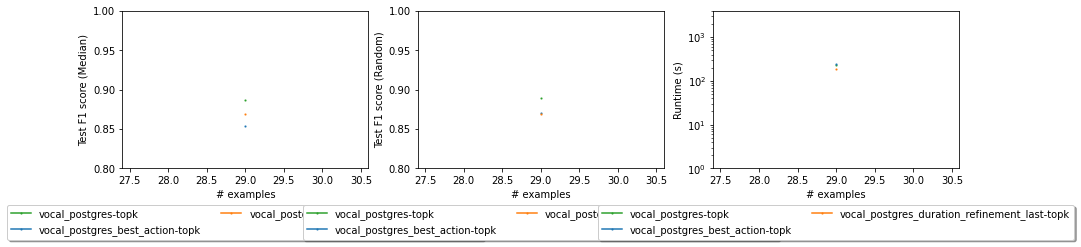

In [45]:
plot_test_query_expansion_strategies()